In [28]:
from ect.helpers import UnimodalGenerator, MultimodalGenerator, Mode
from ect.tracking import FECTTransformer, DECTTransformer
from ect import Config, complex_to_hsv, ilogpolar_new

import cv2
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.axes import Axes
from matplotlib.cm import binary, magma

### Helpers

In [29]:
CART_XLABEL = 'x'
CART_YLABEL = 'y'
CART_TICKS = [x for x in range(0, 501, 100)]


LOG_RLABEL = '$\\rho$'
LOG_PLABEL = '$\\phi$'
LOG_RTICKS = [x for x in range(0, 201, 50)]
LOG_PTICKS = [x for x in range(0, 629, 157)]


def display_fect(
    cart_image: np.ndarray, 
    logpolar_image: np.ndarray, 
    logpolar_transform: np.ndarray = None,
    cart_transform: np.ndarray = None
) -> None:

    fig, axd = plt.subplot_mosaic(
        [['cartimg', 'logimg', 'logect', 'cartect']],
        figsize = (15, 5),
        width_ratios=[1, 0.4, 0.4, 1]
    )    

    ax: Axes = axd['cartimg']
    ax.imshow(cart_image, cmap=binary)
    ax.set_title("Obraz wejściowy:\nwspółrzędne kartezjańskie")
    ax.set_xlabel(CART_XLABEL)
    ax.set_ylabel(CART_YLABEL)
    ax.set_xticks(CART_TICKS)
    ax.set_yticks(CART_TICKS)

    ax: Axes = axd['logimg']
    ax.imshow(logpolar_image, cmap=binary)
    ax.set_title("Obraz wejściowy:\nwspółrzędne\nlogarytmiczno-polarne")
    ax.set_xlabel(LOG_RLABEL)
    ax.set_ylabel(LOG_PLABEL)
    ax.set_xticks(LOG_RTICKS)
    ax.set_yticks(LOG_PTICKS)

    ax: Axes = axd['cartect']
    ax.imshow(cart_transform)
    ax.set_title("Transformata FECT obrazu:\nwspółrzędne kartezjańskie")
    ax.set_xlabel('$u$')
    ax.set_ylabel('$v$')
    ax.set_xticks(CART_TICKS)
    ax.set_yticks(CART_TICKS)

    ax: Axes = axd['logect']
    ax.imshow(logpolar_transform)
    ax.set_title("Transformata FECT \n obrazu")
    ax.set_xlabel('$\\gamma$')
    ax.set_ylabel('$\\theta$')
    ax.set_xticks(LOG_RTICKS)
    ax.set_yticks(LOG_PTICKS)

def rgb(image: np.ndarray) -> np.ndarray:
    return cv2.cvtColor(image.astype(np.float32), cv2.COLOR_GRAY2RGB)


In [30]:
CART_XLABEL = 'x'
CART_YLABEL = 'y'
CART_TICKS = [x for x in range(0, 501, 100)]


LOG_RLABEL = '$\\rho$'
LOG_PLABEL = '$\\phi$'
LOG_RTICKS = [x for x in range(0, 51, 10)]
LOG_PTICKS = [x for x in range(0, 157, 156//4)]

def display_dect(
    cart_image: np.ndarray, 
    logpolar_image: np.ndarray, 
    cart_transform: np.ndarray = None
) -> None:

    fig, axd = plt.subplot_mosaic(
        [['cartimg', 'logimg', 'cartect']],
        figsize = (10, 5),
        width_ratios=[1, 0.4, 0.4]
    )    

    ax: Axes = axd['cartimg']
    ax.imshow(cart_image, cmap=binary)
    ax.set_title("Obraz wejściowy:\nwspółrzędne kartezjańskie")
    ax.set_xlabel(CART_XLABEL)
    ax.set_ylabel(CART_YLABEL)
    ax.set_xticks(CART_TICKS)
    ax.set_yticks(CART_TICKS)

    ax: Axes = axd['logimg']
    ax.imshow(logpolar_image, cmap=binary)
    ax.set_title("Obraz wejściowy:\nwspółrzędne\nlogarytmiczno-polarne")
    ax.set_xlabel(LOG_RLABEL)
    ax.set_ylabel(LOG_PLABEL)
    ax.set_xticks(LOG_RTICKS)
    ax.set_yticks(LOG_PTICKS)

    ax: Axes = axd['cartect']
    ax.imshow(cart_transform, cmap=magma)
    ax.set_title("Transformata DECT \n obrazu")
    ax.set_xlabel('$\\gamma$')
    ax.set_ylabel('$\\theta$')
    ax.set_xticks(LOG_RTICKS)
    ax.set_yticks(LOG_PTICKS)

def rgb(image: np.ndarray) -> np.ndarray:
    return cv2.cvtColor(image.astype(np.float32), cv2.COLOR_GRAY2RGB)


## FECT

### Unimodal image

2024-05-20 01:38:36.621 | DEBUG    | ect.maps.logpolar_new:logpolar:50 - Running logpolar transform in offset mode offset=10
2024-05-20 01:38:36.632 | DEBUG    | ect.maps.logpolar_new:logpolar:63 - Applying bilinear pixel mapping


2024-05-20 01:38:36.706 | DEBUG    | ect.maps.logpolar_new:logpolar:50 - Running logpolar transform in offset mode offset=10
2024-05-20 01:38:36.717 | DEBUG    | ect.maps.logpolar_new:logpolar:63 - Applying bilinear pixel mapping
2024-05-20 01:38:37.010 | DEBUG    | ect.maps.ilogpolar_new:ilogpolar:78 - Running logpolar transform in offset mode
2024-05-20 01:38:37.023 | DEBUG    | ect.maps.ilogpolar_new:ilogpolar:94 - Applying bilinear pixel mapping


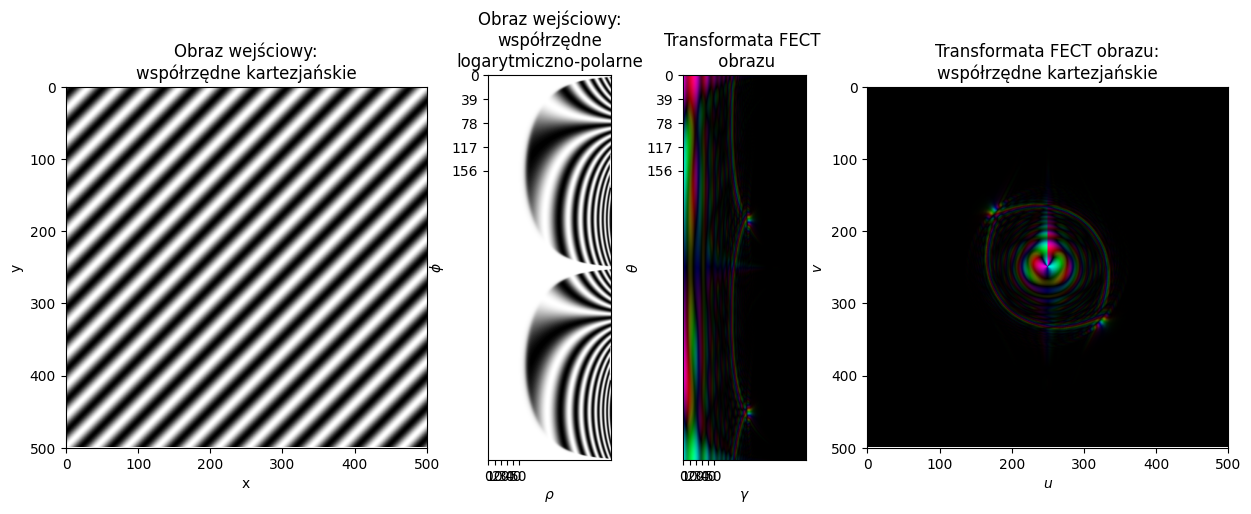

In [31]:
m = Mode(30, 45)
DSIZE = (628, 200)

gen = UnimodalGenerator(m, dsize=DSIZE)
gen_cart = UnimodalGenerator(m, dsize=DSIZE, logpolar=False)
tr = FECTTransformer(cfg=Config(ect_offset_value_px=0, offset_value_px=10), dsize=(628,200))


cart_img = gen_cart.generate()
log_img = gen.generate()

log_ect = tr.transform(cart_img)
log_ect_d = complex_to_hsv(log_ect)

ilp = lambda x: ilogpolar_new(x, (500, 500), 5, Config(offset_value_px=0))

cart_ect = ilp(log_ect)
cart_ect_d = complex_to_hsv(cart_ect)

display_fect(cart_img, log_img, log_ect_d, cart_ect_d)

### Multimodal image

2024-05-20 01:38:38.025 | DEBUG    | ect.maps.logpolar_new:logpolar:50 - Running logpolar transform in offset mode offset=10
2024-05-20 01:38:38.037 | DEBUG    | ect.maps.logpolar_new:logpolar:63 - Applying bilinear pixel mapping


2024-05-20 01:38:38.124 | DEBUG    | ect.maps.logpolar_new:logpolar:50 - Running logpolar transform in offset mode offset=10
2024-05-20 01:38:38.133 | DEBUG    | ect.maps.logpolar_new:logpolar:63 - Applying bilinear pixel mapping
2024-05-20 01:38:38.479 | DEBUG    | ect.maps.ilogpolar_new:ilogpolar:78 - Running logpolar transform in offset mode
2024-05-20 01:38:38.492 | DEBUG    | ect.maps.ilogpolar_new:ilogpolar:94 - Applying bilinear pixel mapping


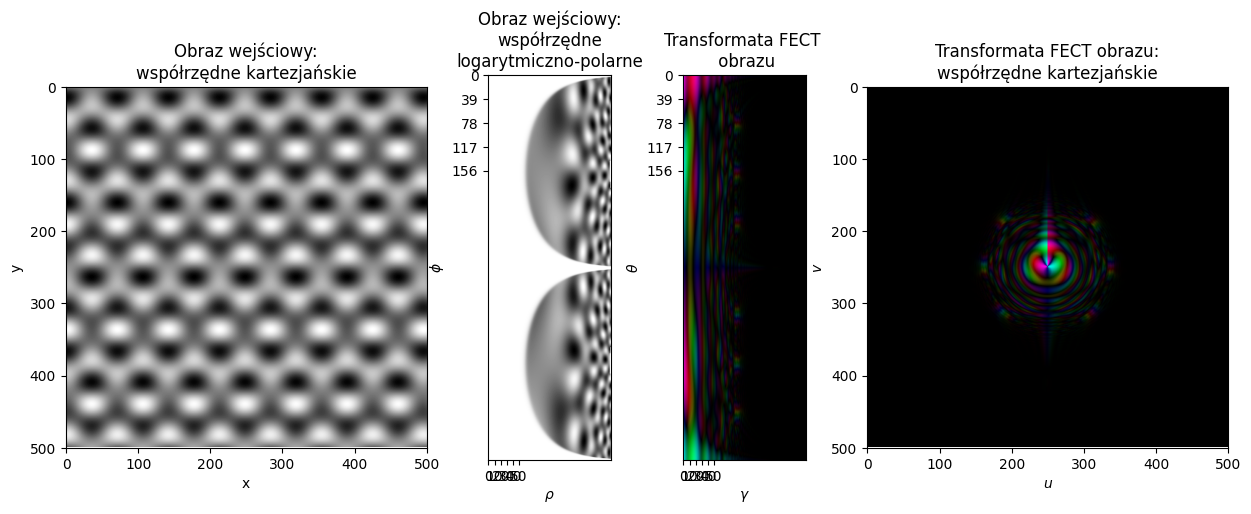

In [32]:
m = [Mode(50, 90, 3), Mode(50, 45, 3), Mode(50, 135, 3)]
DSIZE = (628, 200)

gen = MultimodalGenerator(m, dsize=DSIZE)
gen_cart = MultimodalGenerator(m, dsize=DSIZE, logpolar=False)
tr = FECTTransformer(cfg=Config(ect_offset_value_px=0, offset_value_px=10), dsize=(628,200))


cart_img = gen_cart.generate()
log_img = gen.generate()
log_ect = tr.transform(cart_img)
log_ect_d = complex_to_hsv(log_ect)

ilp = lambda x: ilogpolar_new(x, (500, 500), 5, Config(offset_value_px=0))

cart_ect = ilp(log_ect)
cart_ect_d = complex_to_hsv(cart_ect)

display_fect(cart_img, log_img, log_ect_d, cart_ect_d)

## DECT

### Unimodal Image

In [33]:
def center(inp: np.ndarray, invfunc = lambda x: x) -> np.ndarray:
    X, Y = inp.shape
    inp = invfunc(inp)
    out = np.zeros_like(inp)
    out[:X//2, :Y//2] = inp[X//2:, Y//2:]
    out[X//2:, :Y//2] = inp[:X//2, Y//2:]
    out[X//2:, Y//2:] = inp[:X//2, :Y//2]
    out[:X//2, Y//2:] = inp[X//2:, :Y//2]
    return out

2024-05-20 01:38:39.442 | DEBUG    | ect.maps.logpolar_new:logpolar:50 - Running logpolar transform in offset mode offset=10
2024-05-20 01:38:39.444 | DEBUG    | ect.maps.logpolar_new:logpolar:63 - Applying bilinear pixel mapping


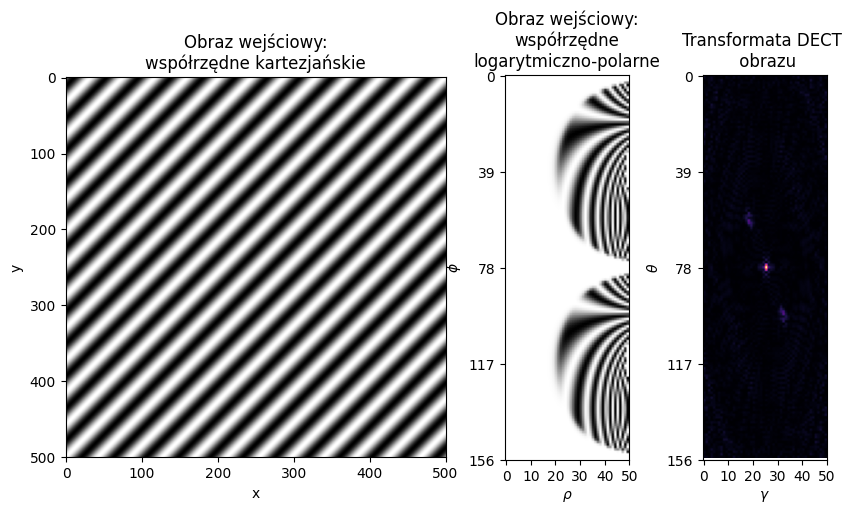

In [34]:
m = Mode(30, 45)
DSIZE = (156, 50)

gen = UnimodalGenerator(m, dsize=DSIZE)
gen_cart = UnimodalGenerator(m, dsize=DSIZE, logpolar=False)
tr = DECTTransformer(cfg=Config(antialias_factors=[0, 0]), dsize=DSIZE)

cart_img = gen_cart.generate()
log_img = gen.generate()

log_ect = tr.transform(log_img, logpolar=False)
log_ect_d = center(log_ect, np.abs)

display_dect(cart_img, log_img, log_ect_d)

### Multimodal Image

2024-05-20 01:44:07.694 | DEBUG    | ect.maps.logpolar_new:logpolar:50 - Running logpolar transform in offset mode offset=10
2024-05-20 01:44:07.695 | DEBUG    | ect.maps.logpolar_new:logpolar:63 - Applying bilinear pixel mapping


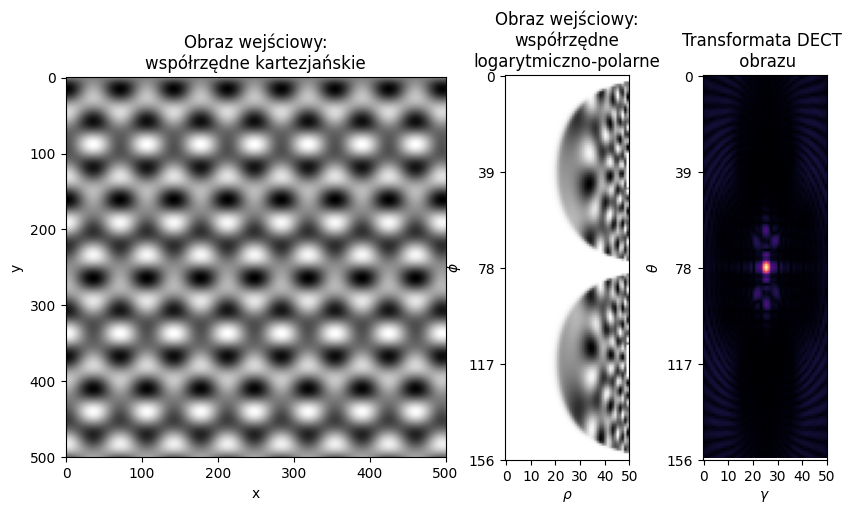

In [46]:
DSIZE = (156, 50)
m = [Mode(50, 90, 3), Mode(50, 45, 3), Mode(50, 135, 3)]

gen = MultimodalGenerator(m, dsize=DSIZE, offset=10)
gen_cart = MultimodalGenerator(m, dsize=DSIZE, logpolar=False, offset=10)
tr = DECTTransformer(cfg=Config(offset_value_px=10, antialias_factors=[0.14, 0.14]), dsize=DSIZE)

cart_img = gen_cart.generate()
log_img = gen.generate()

log_ect = tr.transform(log_img, logpolar=False)
log_ect_d = center(log_ect, lambda x: np.power(np.abs(x),0.75))

display_dect(cart_img, log_img, log_ect_d)